# HW8: Clustering

## Syed Nisar Hussain

### sh07126@st.habib.edu.pk


In [533]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [534]:
df = pd.read_csv("baskin_robbins_icecream.csv")
df.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),Category
0,Bananas Foster,160,8.0,0.2,20,16,2.0,std
1,Baseball Nut,160,9.0,0.2,19,13,3.0,std
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,std
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,std
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,light


### Q1: Cleaning the data


In [535]:
X = df.drop(["Flavour", "Category"], axis=1)
X.head()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,160,8.0,0.2,20,16,2.0
1,160,9.0,0.2,19,13,3.0
2,170,9.0,0.3,21,15,3.0
3,120,4.0,0.1,17,16,3.0
4,130,2.0,0.1,26,20,2.0


### Q2: Scaling the data


In [536]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[0.34615385, 0.13333333, 0.4       , 0.28      , 0.5       ,
        0.25      ],
       [0.34615385, 0.15      , 0.4       , 0.24      , 0.375     ,
        0.375     ],
       [0.38461538, 0.15      , 0.6       , 0.32      , 0.45833333,
        0.375     ],
       [0.19230769, 0.06666667, 0.2       , 0.16      , 0.5       ,
        0.375     ],
       [0.23076923, 0.03333333, 0.2       , 0.52      , 0.66666667,
        0.25      ]])

### Q3: Knee plot and Silhouette Coefficient plot


In [537]:
wss = []
sil = []
for i in range(2, 12):
    kmeans = KMeans(n_clusters=i, max_iter = 500, n_init = 10, random_state = 99)
    kmeans.fit(X_scaled)
    wss.append(kmeans.inertia_)
    sil.append(silhouette_score(X_scaled, kmeans.labels_))


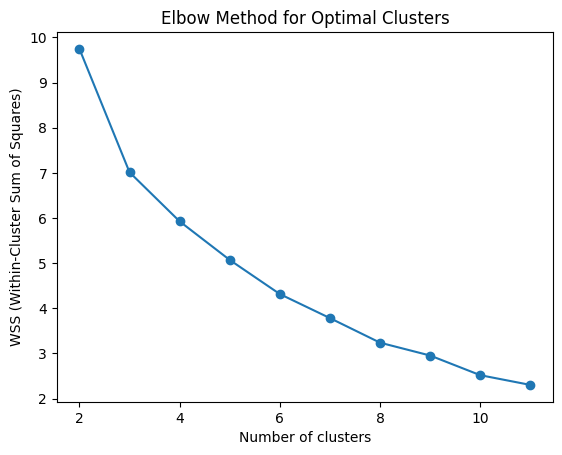

In [538]:
plt.plot(range(2, 12), wss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WSS (Within-Cluster Sum of Squares)')
plt.show()

Interpretation: The Knee Plot indicates that from 3 clusters onwards the performance improvement is not that significant and therefore, as per this plot, it makes sense to opt for 3 clusters to achieve the optimal performance.


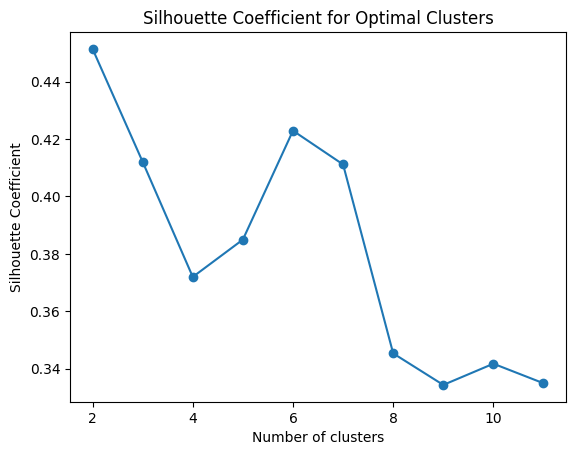

In [539]:
plt.plot(range(2, 12), sil, marker='o')
plt.title('Silhouette Coefficient for Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

Interpretation: The silhouette coefficient plot shows the top 2 highest scores are at 2 and 6, however going for 6 clusters, would be too many clusters for our dataset. On the other hand, going with 2 clusters would be too less based on the results from knee plot as well. Therefore, choosing 3 clusters seems like the fair middle ground for this problem.


### Q4: Optimal K-Means clustering


In [540]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 99)
Y = kmeans.fit_predict(X_scaled)
X['Cluster'] = Y

### Q5: Visualizing the clustering results


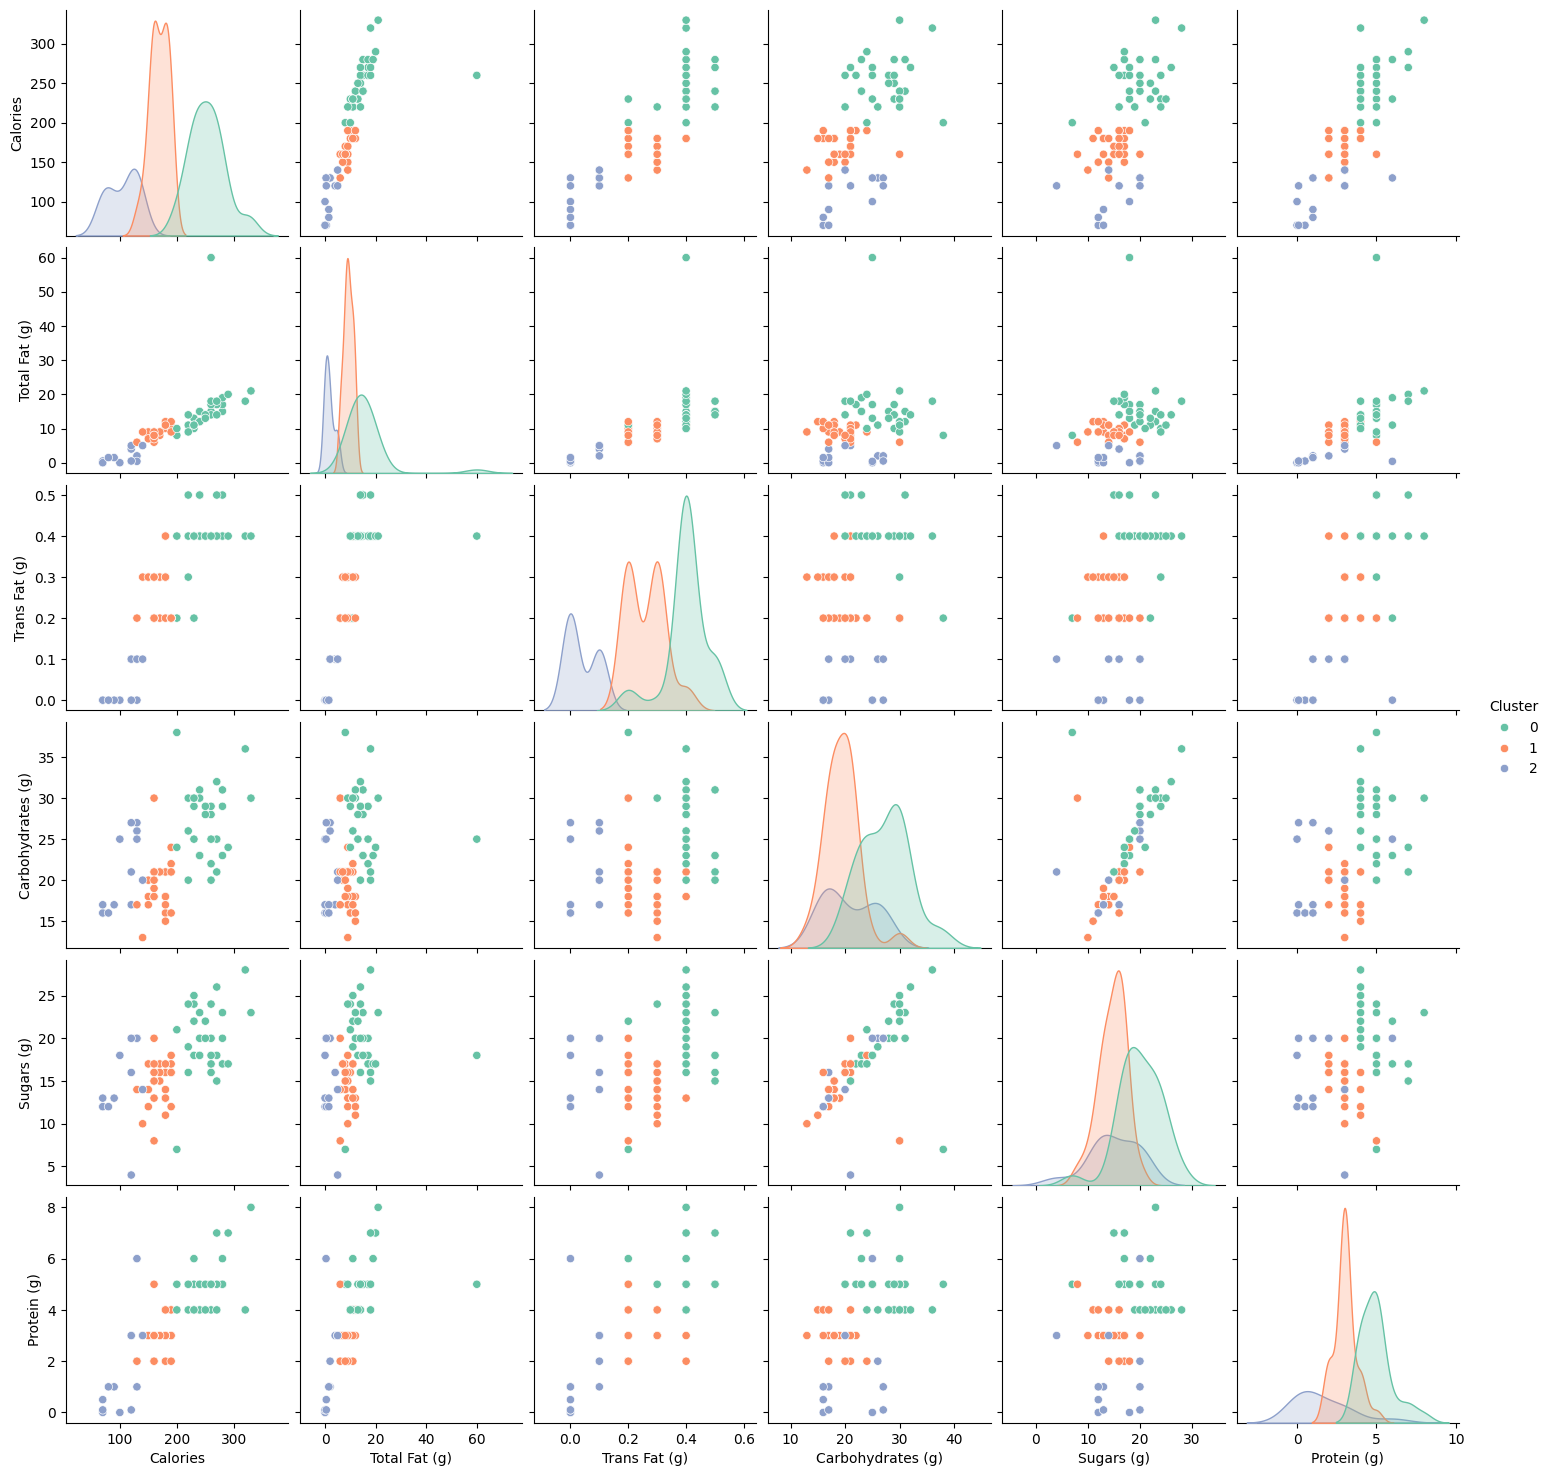

In [541]:
sns.pairplot(X, vars=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)'], hue='Cluster', diag_kind='kde', palette='Set2')
plt.show()

Interpretation: The pairplots show that the clustering worked well for a lot of variables such as Calories vs Carbs, Protein vs Carbs, Total Fat vs Calories. However, it wasn't too effective for few other variables but overall the plot indicates a decent clustering performance.


In [542]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(X_scaled)

In [543]:
optimal_clusters = 3

centroids = kmeans.cluster_centers_  
centroids_pca = pca.transform(centroids) 

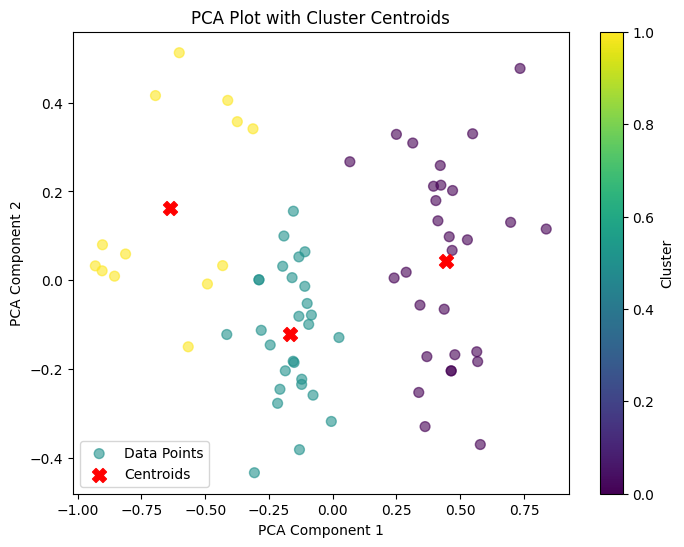

In [544]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=X['Cluster'], cmap='viridis', s=50, alpha=0.6, label='Data Points')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title('PCA Plot with Cluster Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()

Interpretation: After using PCA to reduce dimensionality, we can see that choosing to classify the data in 3 clusters was a good option. We can observe three very distinct clusters with their cluster centroids which indicates an overall good clustering.


### Q6: Cluster-specific Dataframes


In [545]:
C1 = df[X['Cluster'] == 0]
C2 = df[X['Cluster'] == 1]
C3 = df[X['Cluster'] == 2]

### Q7: Insights


In [546]:
C1.describe()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,252.758621,15.896552,0.400000,27.275862,19.965517,4.965517
std,30.925781,9.123536,0.070711,4.463315,4.153164,1.017095
min,200.000000,8.000000,0.200000,20.000000,7.000000,4.000000
25%,230.000000,12.000000,0.400000,24.000000,18.000000,4.000000
50%,250.000000,14.000000,0.400000,28.000000,20.000000,5.000000
75%,270.000000,17.000000,0.400000,30.000000,23.000000,5.000000
max,330.000000,60.000000,0.500000,38.000000,28.000000,8.000000


Insights:

- Highest caloric content (mean 252.8 calories) with substantial fat content (15.9g mean), representing traditional, full-bodied ice creams
- Highest protein content (mean 5g, max 8g) suggests these varieties likely contain nuts, dairy protein, or other protein-rich ingredients
- High carbohydrate (27.3g mean) and sugar content (20g mean) indicates these are classic, full-flavored ice creams with no compromises


In [547]:
C2.describe()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,168.571429,9.142857,0.260714,19.357143,14.678571,3.035714
std,16.265001,1.819937,0.062889,3.188106,2.611280,0.692935
min,130.000000,6.000000,0.200000,13.000000,8.000000,2.000000
25%,160.000000,8.000000,0.200000,17.750000,13.000000,3.000000
50%,170.000000,9.000000,0.300000,19.500000,15.000000,3.000000
75%,180.000000,11.000000,0.300000,21.000000,16.250000,3.000000
max,190.000000,12.000000,0.400000,30.000000,20.000000,5.000000


Insights:

- Moderate nutritional profile with balanced calories (168.6 mean) and fat content (9.1g mean), making these more everyday options
- Very consistent nutritional profile (lowest standard deviations across most metrics) suggests standardized recipes
- Moderate protein (3g mean) and sugar levels (14.7g mean) indicate these are traditional ice creams with controlled portions


In [548]:
C3.describe()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,105.384615,1.723077,0.038462,20.769231,14.923077,1.592308
std,26.336092,1.838547,0.050637,4.585373,4.716311,1.763265
min,70.000000,0.000000,0.000000,16.000000,4.000000,0.000000
25%,80.000000,0.400000,0.000000,17.000000,12.000000,0.100000
50%,120.000000,1.500000,0.000000,20.000000,14.000000,1.000000
75%,130.000000,2.000000,0.100000,25.000000,20.000000,3.000000
max,140.000000,5.000000,0.100000,27.000000,20.000000,6.000000


Insights:

- Significantly lowest calories (105.4 mean) and minimal fat content (1.7g mean), clearly targeting health-conscious consumers
- Extremely low trans fat (0.038g mean) and lowest protein content (1.6g mean) suggests these are likely sorbets or light frozen desserts
- Despite being "light" options, they maintain decent carbohydrate levels (20.8g mean) and sugars (14.9g mean) to preserve taste


### Q8: Unique cluster names


Cluster 1 (C1):

Name: "Premium Indulgence"

Reason: As described in the insights, this cluster contains icecreams that are nutrition heavy. These could be the most premium icecreams available at Baskin Robbins, with a lot rich ingredients making it high in terms of caloric density as well.


Cluster 2 (C2):

Name: "Balanced Favorites"

Reason: These are the standard go-to icecream options at Baskin Robbins. They have a consistent nutritional profile and provide a balanced experience to the customer.


Cluster 3 (C3):

Name: "Light Refreshers"

Reason: Icecreams in this cluster are significantly less dense in terms of calories than other clusters. Moreover, a low fat content also suggests that these maybe the healthier options available at Baskin Robbins and people who want to satisfy their sweet cravings without violating their diet plans, may opt for these options. These could very likely be non-dairy frozen desserts.
